In [1]:
# Import stage of libraries
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
import os, shutil

In [3]:
#Original dataset adding phase
original_dataset_dir = 'c:/Veriseti'

In [4]:
# Create a folder named GTsmall to create a smaller dataset
base_dir = 'c:/GTsmall'
os.mkdir(base_dir)

In [5]:
#base_dir folder under train, validation, test folder creation phase
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:

#Adding the folder folder to the train folder 
train_glasses_dir = os.path.join(train_dir, 'glasses')
os.mkdir(train_glasses_dir)

# Adding toothbrush folder to train folder
train_toothbrush_dir = os.path.join(train_dir, 'toothbrush')
os.mkdir(train_toothbrush_dir)

# Adding the folder of glasses to the validation folder
validation_glasses_dir = os.path.join(validation_dir, 'glasses')
os.mkdir(validation_glasses_dir)

# Adding the toothbrush folder to the validation folder
validation_toothbrush_dir = os.path.join(validation_dir, 'toothbrush')
os.mkdir(validation_toothbrush_dir)

# Adding the folder of glasses to the test folder
test_glasses_dir = os.path.join(test_dir, 'glasses')
os.mkdir(test_glasses_dir)

# Adding the toothbrush folder to the test folder
test_toothbrush_dir = os.path.join(test_dir, 'toothbrush')
os.mkdir(test_toothbrush_dir)

In [7]:

#Adding glasses photos to the train folder
fnames = ['glasses.{}.jpg'.format(i) for i in range(1,61)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_glasses_dir, fname)
    shutil.copyfile(src, dst)

#Adding glasses photos to validation folder
fnames = ['glasses.{}.jpg'.format(i) for i in range(61, 76)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_glasses_dir, fname)
    shutil.copyfile(src, dst)
    
# Adding glasses photos to the test folder
fnames = ['glasses.{}.jpg'.format(i) for i in range(76, 91)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_glasses_dir, fname)
    shutil.copyfile(src, dst)
    
# Adding toothbrush photos to the # train folder 
fnames = ['toothbrush.{}.jpg'.format(i) for i in range(91,151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_toothbrush_dir, fname)
    shutil.copyfile(src, dst)
    
# Adding toothbrush photos to the  validation folder 
fnames = ['toothbrush.{}.jpg'.format(i) for i in range(151, 166)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_toothbrush_dir, fname)
    shutil.copyfile(src, dst)
    

# Adding toothbrush photos to the test folder
fnames = ['toothbrush.{}.jpg'.format(i) for i in range(166,181)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_toothbrush_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('total training glasses images:', len(os.listdir(train_glasses_dir)))

total training glasses images: 60


In [9]:
print('total training toothbrush images:', len(os.listdir(train_toothbrush_dir)))

total training toothbrush images: 60


In [10]:
print('total validation glasses images:', len(os.listdir(validation_glasses_dir)))

total validation glasses images: 15


In [11]:
print('total validation toothbrush images:', len(os.listdir(validation_toothbrush_dir)))

total validation toothbrush images: 15


In [12]:
print('total test glasses images:', len(os.listdir(test_glasses_dir)))

total test glasses images: 15


In [13]:
print('total test toothbrush images:', len(os.listdir(test_toothbrush_dir)))

total test toothbrush images: 15


Creating the Convent Processes We create the entities with 2 types of layers. These are Conv2D and MaxPooling2D. In the case of convulation, sections (3.3) where the local regions in the picture are learned are added. The filter depth is determined. These are (32,64,128,256). From the Maxpooling addition, it transforms the incoming image by dividing them into non-overlapping rectangles that reduce each area to the maximum value. We used the value (2,2) here. We chose relu as the activation function in the input layers. We used sigmoid as it would make a single output at the output layer. With the Flatten layer, we transformed the 3D inputs into 1D vectors and we processed the images in tensor size

In [14]:
#Creating Layers in Constructions
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
# Displaying the layers we created
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)       147584    
__________


We chose binary_crossentropy as the loss function to be used in our model. Because our model is expected to compare 2 picture elements. We have used RMSprop as an optimizer function. In performance metrics, we tested the performance of our model with the ACC performance criterion.

In [16]:
#optimizer, loss and metrics selection
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [17]:
#Performing phase of pictures
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [19]:
#Model training stage
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/8
30/30 [==============================] - 62s 2s/step - loss: 0.6591 - acc: 0.6167 - val_loss: 0.5649 - val_acc: 0.8000
Epoch 2/8
30/30 [==============================] - 61s 2s/step - loss: 0.3085 - acc: 0.9133 - val_loss: 0.3416 - val_acc: 0.8000
Epoch 3/8
30/30 [==============================] - 56s 2s/step - loss: 0.1552 - acc: 0.9533 - val_loss: 0.6486 - val_acc: 0.8000
Epoch 4/8
30/30 [==============================] - 61s 2s/step - loss: 0.1343 - acc: 0.9533 - val_loss: 0.3382 - val_acc: 0.8333
Epoch 5/8
30/30 [==============================] - 55s 2s/step - loss: 0.0843 - acc: 0.9700 - val_loss: 0.3458 - val_acc: 0.8333
Epoch 6/8
30/30 [==============================] - 47s 2s/step - loss: 0.0481 - acc: 0.9800 - val_loss: 0.2409 - val_acc: 0.8667
Epoch 7/8
30/30 [==============================] - 52s 2s/step - loss: 0.0321 - acc: 0.9867 - val_loss: 0.1794 - val_acc: 0.9333
Epoch 8/8
30/30 [==============================] - 48s 2s/step - loss: 0.0209 - acc: 0.9933 - val

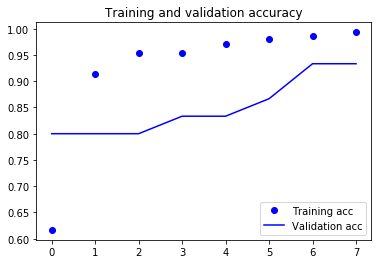

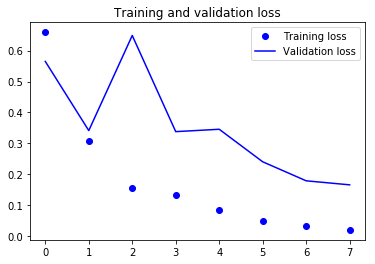

In [21]:
# Showing results in the graph
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
#Epoch Replacement Process
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(300, 300),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=7,
      validation_data=validation_generator,
      validation_steps=10)

Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/7
30/30 [==============================] - 50s 2s/step - loss: 0.6051 - acc: 0.6767 - val_loss: 0.4243 - val_acc: 0.8333
Epoch 2/7
30/30 [==============================] - 46s 2s/step - loss: 0.2417 - acc: 0.9300 - val_loss: 0.3403 - val_acc: 0.8333
Epoch 3/7
30/30 [==============================] - 49s 2s/step - loss: 0.1647 - acc: 0.9300 - val_loss: 0.2789 - val_acc: 0.8667
Epoch 4/7
30/30 [==============================] - 47s 2s/step - loss: 0.1086 - acc: 0.9667 - val_loss: 0.1740 - val_acc: 0.9333
Epoch 5/7
30/30 [==============================] - 46s 2s/step - loss: 0.0695 - acc: 0.9767 - val_loss: 0.2301 - val_acc: 0.8667
Epoch 6/7
30/30 [==============================] - 47s 2s/step - loss: 0.0390 - acc: 0.9900 - val_loss: 0.1193 - val_acc: 0.9667
Epoch 7/7
30/30 [==============================] - 47s 2s/step - loss: 0.0365 - acc: 0.9867 - val_loss: 0.0790 - val_acc: 0.9333


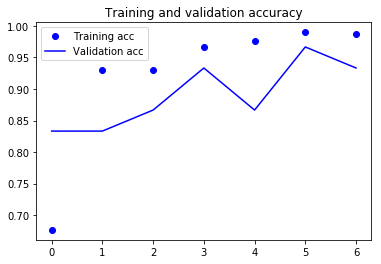

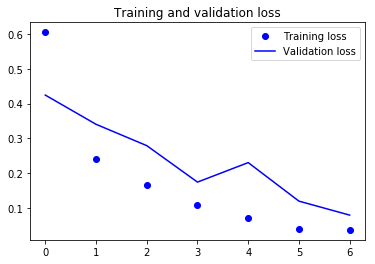

In [23]:
# Showing results in the graph
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
#DATA AUGMENTATİON Usage
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

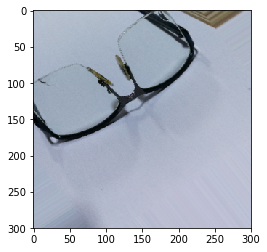

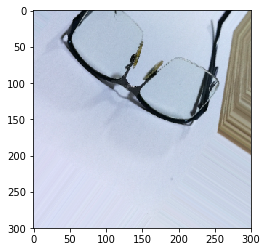

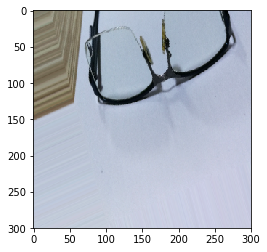

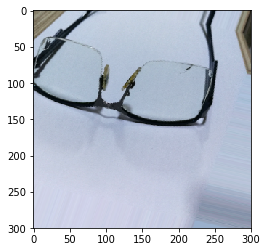

In [25]:
from keras.preprocessing import image

fnames = [os.path.join(train_glasses_dir, fname) for fname in os.listdir(train_glasses_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [26]:
#Creating Layers with Data Augmentation
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
#Data Augmentation model creation phase
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=10)

Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/20
30/30 [==============================] - 58s 2s/step - loss: 0.6567 - acc: 0.5633 - val_loss: 0.4452 - val_acc: 0.9333
Epoch 2/20
30/30 [==============================] - 54s 2s/step - loss: 0.4493 - acc: 0.8100 - val_loss: 0.2023 - val_acc: 0.9333
Epoch 3/20
30/30 [==============================] - 54s 2s/step - loss: 0.2346 - acc: 0.9267 - val_loss: 0.0528 - val_acc: 1.0000
Epoch 4/20
30/30 [==============================] - 55s 2s/step - loss: 0.2412 - acc: 0.9100 - val_loss: 0.2218 - val_acc: 0.8667
Epoch 5/20
30/30 [==============================] - 55s 2s/step - loss: 0.1440 - acc: 0.9500 - val_loss: 0.0149 - val_acc: 1.0000
Epoch 6/20
30/30 [==============================] - 54s 2s/step - loss: 0.1228 - acc: 0.9567 - val_loss: 0.1420 - val_acc: 0.9333
Epoch 7/20
30/30 [==============================] - 55s 2s/step - loss: 0.0775 - acc: 0.9700 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 8/2

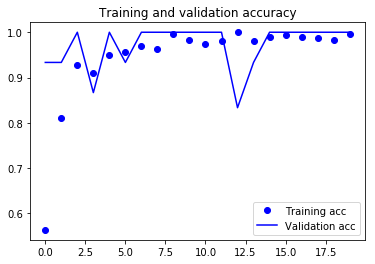

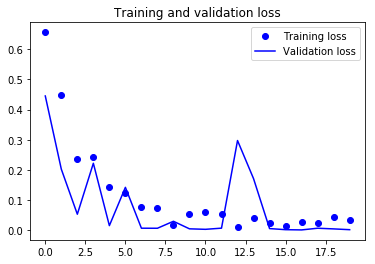

In [28]:
# Showing results in the graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
#Adding Dropout to Layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [30]:
#Determining the characteristics of the model after adding the #Dropout process
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=10)

Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/20
30/30 [==============================] - 67s 2s/step - loss: 0.7037 - acc: 0.5333 - val_loss: 0.6617 - val_acc: 0.6000
Epoch 2/20
30/30 [==============================] - 67s 2s/step - loss: 0.6487 - acc: 0.6033 - val_loss: 0.5112 - val_acc: 0.9000
Epoch 3/20
30/30 [==============================] - 64s 2s/step - loss: 0.5632 - acc: 0.7200 - val_loss: 0.3767 - val_acc: 0.8333
Epoch 4/20
30/30 [==============================] - 65s 2s/step - loss: 0.4390 - acc: 0.8033 - val_loss: 0.3153 - val_acc: 0.8333
Epoch 5/20
30/30 [==============================] - 65s 2s/step - loss: 0.3221 - acc: 0.8533 - val_loss: 0.1195 - val_acc: 0.9667
Epoch 6/20
30/30 [==============================] - 63s 2s/step - loss: 0.3388 - acc: 0.8900 - val_loss: 0.0728 - val_acc: 1.0000
Epoch 7/20
30/30 [==============================] - 64s 2s/step - loss: 0.1568 - acc: 0.9700 - val_loss: 0.3676 - val_acc: 0.8667
Epoch 8/2

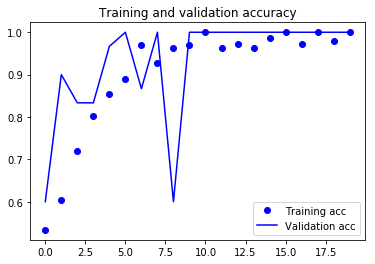

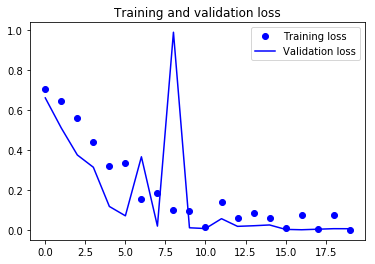

In [31]:
# Showing results in the graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
# Adding kernel_regularizer to Layers with Weight Regularization
from keras import regularizers
from keras.regularizers import l2

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),kernel_regularizer=l2(0.01), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3),kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(300, 300),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=7)

Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/20
25/25 [==============================] - 62s 2s/step - loss: 3.4925 - acc: 0.5440 - val_loss: 3.2178 - val_acc: 0.5000
Epoch 2/20
25/25 [==============================] - 63s 3s/step - loss: 3.0800 - acc: 0.7120 - val_loss: 2.7811 - val_acc: 0.9667
Epoch 3/20
25/25 [==============================] - 58s 2s/step - loss: 2.7359 - acc: 0.8120 - val_loss: 2.4804 - val_acc: 0.9333
Epoch 4/20
25/25 [==============================] - 65s 3s/step - loss: 2.4034 - acc: 0.8960 - val_loss: 2.1528 - val_acc: 0.9667
Epoch 5/20
25/25 [==============================] - 62s 2s/step - loss: 2.2092 - acc: 0.8880 - val_loss: 1.9866 - val_acc: 1.0000
Epoch 6/20
25/25 [==============================] - 65s 3s/step - loss: 2.0019 - acc: 0.9320 - val_loss: 1.8096 - val_acc: 1.0000
Epoch 7/20
25/25 [==============================] - 60s 2s/step - loss: 1.9241 - acc: 0.9160 - val_loss: 1.7206 - val_acc: 1.0000
Epoch 8/2

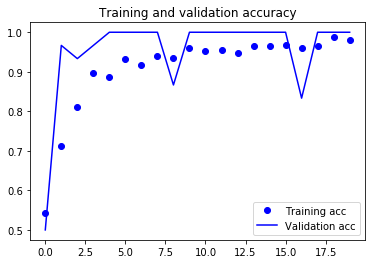

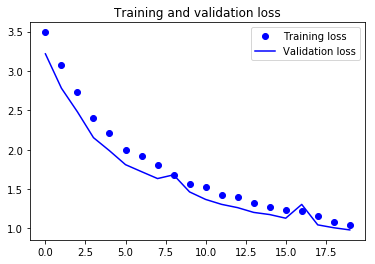

In [34]:
# Showing results in the graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
# The process of saving our model to h5 file
model.save('glasses_toothbrush_small_1.h5')